In [64]:
import pandas as pd
import numpy as np
import pydot
import pydotplus
import graphviz
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.utils import to_categorical
import math
import matplotlib.pyplot as plt

df = pd.read_excel('../data/data.xlsx')
encodings = [0] * df.shape[0]
#print(encodings)
rowcount = 0
for index, row in df.iterrows():
    i = 0
    target = row['target']
    gRNA = row['gRNA']
    temp = [0] * len(target)
    while i < len(target):
        if target[i] == gRNA[i]:
            temp[i] = 0
        else:
            temp[i] = 1
        i = i + 1
    encodings[rowcount] = np.array(temp) #''.join(map(str, temp))
    rowcount = rowcount + 1
    #print(''.join(map(str, temp)))
#print(encodings)
df_x  =   pd.DataFrame(list(map(np.ravel, encodings)))                  
df["cfdScore"] = pd.to_numeric(df["cfdScore"], downcast="float")
#print(df.dtypes)
# print(df_x)
y = df.cfdScore
x =   df_x #df.encoding#df.drop(['cfdScore', 'wasValidated','readFraction','target','gRNA'],axis=1)
print(len(encodings[8]))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

# network = models.Sequential()
# network.add(layers.Dense(16, activation='relu', input_shape=(len(encodings[8]),)))
# network.add(layers.Dense(8, activation='relu'))
# network.add(Dense(1)) #, activation='softmax'))

# network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#                 loss='mse',
#                 metrics=['mae'])

# history = network.fit(x_train, y_train,
#                     validation_data=(x_test, y_test),
#                     epochs=35,
#                     batch_size=200)



#######################################################################################################
### RNN #############################


# model = Sequential()
# model.add(SimpleRNN(16, input_shape=(len(encodings[8]),1), 
#                         activation='relu')) #tanh
# model.add(Dense(units=8, activation='relu')) #tanh
# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='mse',metrics=['mae'])
# model.summary()
# history = model.fit(x_train, y_train,
#                     validation_data=(x_test, y_test),
#                     epochs=35,batch_size=200)   


######################################################################################################
## Perceptron #############################

# model = Sequential()
# model.add(Dense(16, input_shape=(23, ), activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1))

# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='mse',metrics=['mae'])
# history = model.fit(x_train, y_train,
#                     validation_data=(x_test, y_test),
#                     epochs=35,
#                     batch_size=200) 

# y_pred = model.predict(x_test)




23
shape of input - training set (20841, 23)
shape of output - training set (20841,)
shape of input - testing set (5211, 23)
shape of output - testing set (5211,)
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 16)                288       
                                                                 
 dense_45 (Dense)            (None, 8)                 136       
                                                                 
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
417/417 [==============================] - 1s 3ms/step - loss: 0.0090 - mae: 0.0503 - val_loss: 0.0066 - val_mae: 0.0431
Epoch 2/35
417/417 [==============================] - 1s 2ms/step - loss: 0.0064 - mae: 0.0427 - val_loss: 0.0059 - val_mae: 0.0434
Epoch 3/35
417/417 [====

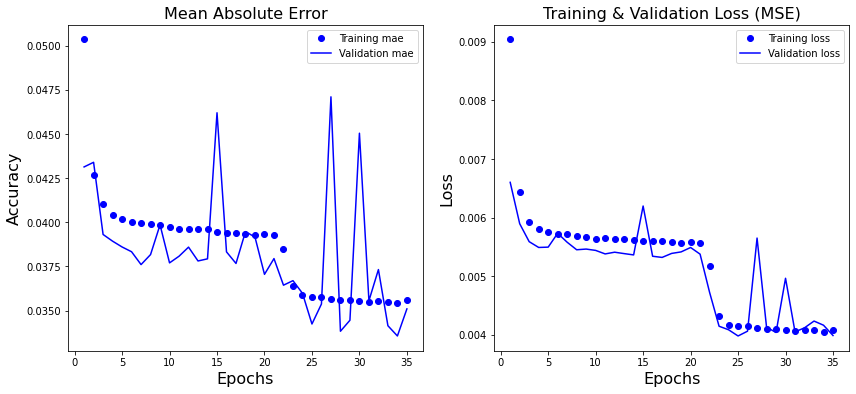

In [65]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mae')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Mean Absolute Error', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss (MSE)', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
